In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib
#!pip install apache-beam
!pip install tfds-nightly

     |████████████████████████████████| 3.8MB 6.2MB/s 


conveting yolo to csv code before building tfds

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import pandas as pd
import csv
from PIL import Image
import os, sys
shape = 416

In [ ]:
path = "/content/drive/Shareddrives/EEC193ATrackC/data/image_dir_train"
dirs = os.listdir( path )
final_size = 416;

def resize_aspect_fit():
    for item in dirs:
         if item == '.DS_Store':
             continue
         if os.path.isfile(path+item):
             im = Image.open(path+item)
             f, e = os.path.splitext(path+item)
             size = im.size
             ratio = float(final_size) / max(size)
             new_image_size = tuple([int(x*ratio) for x in size])
             im = im.resize(new_image_size, Image.ANTIALIAS)
             new_im = Image.new("RGB", (final_size, final_size))
             new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
             new_im.save(f + 'resized.jpg', 'JPEG', quality=90)
resize_aspect_fit()

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/Shareddrives/EEC193ATrackC/data/image_dir_test'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((shape,shape))
    width, height = img.size
    img.save(f_img)

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'/content/drive/Shareddrives/EEC193ATrackC/data/image_dir_train'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((shape,shape))
    width, height = img.size
    img.save(f_img)

In [ ]:
os.chdir(r'/content/drive/Shareddrives/EEC193ATrackC/data/Annotations')
myFiles = glob.glob('*.txt')

In [ ]:
width=shape
height=shape
image_id=0
final_df=[]
for item in myFiles:
    row=[]
    bbox_temp=[]
    with open(item, 'rt') as fd:
        first_line = fd.readline()
        splited = first_line.split();
        
        row.append(image_id)
        row.append(width)
        row.append(height)    
        try:
            bbox_temp.append(float(splited[1])*width)
            bbox_temp.append(float(splited[2])*height)
            bbox_temp.append(float(splited[3])*width)
            bbox_temp.append(float(splited[4])*height)
            row.append(bbox_temp)
            final_df.append(row)
        except:
            print("file is not in YOLO format!")
            
df = pd.DataFrame(final_df,columns=['image_id', 'width', 'height','bbox'])
#after the conversion we are going to clean up the data so theya re no duplicate values
#since inorder to use tfds we are requiere for the keys to be unique

df.to_csv("YoLolabelsTraine.csv",index=False)


from more_itertools import unique_everseen
with open('YoLolabelsTraine.csv','r') as f, open('Traine1.csv','w') as out_file:
    out_file.writelines(unique_everseen(f))
#display         
d = pd.read_csv('Traine1.csv')
d

,image_id,width,height,bbox


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

now we conver the test labels from yolo to csv

In [ ]:
os.chdir(r'/content/drive/Shareddrives/EEC193ATrackC/data/xml_test')
myFiles = glob.glob('*.txt')

In [ ]:
width=shape
height=shape
image_id=0
final_df=[]
for item in myFiles:
    row=[]
    bbox_temp=[]
    with open(item, 'rt') as fd:
        first_line = fd.readline()
        splited = first_line.split();
        
        row.append(image_id)
        row.append(width)
        row.append(height)
        try:
            bbox_temp.append(float(splited[1])*width)
            bbox_temp.append(float(splited[2])*height)
            bbox_temp.append(float(splited[3])*width)
            bbox_temp.append(float(splited[4])*height)
            row.append(bbox_temp)
            final_df.append(row)
        except:
            print("file is not in YOLO format!")
df = pd.DataFrame(final_df,columns=['image_id', 'width', 'height','bbox'])

df.to_csv("YoLolabelsTest.csv",index=False)


from more_itertools import unique_everseen
with open('YoLolabelsTest.csv','r') as f, open('Test1.csv','w') as out_file:
    out_file.writelines(unique_everseen(f))

Now that we have the nesesary format input we move on to create 

In [ ]:
%cd /content

/content


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
!tfds new Dataset #--overwrite  # Create the new dataset files inside rfcx_tfds/
# [...] Modify the dataset files as you want


2021-03-16 00:19:13.787935: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Dataset generated at /content/Dataset
You can start searching `TODO(Dataset)` to complete the implementation.
Please check https://www.tensorflow.org/datasets/add_dataset for additional details.


In [ ]:
%cd /content/Dataset
!tfds build #--max_examples_per_split # Generate the dataSet in the current directory

[Errno 2] No such file or directory: '/content/Dataset'
/content
2021-03-16 00:19:10.040947: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "/usr/local/bin/tfds", line 8, in <module>
    sys.exit(launch_cli())
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/main.py", line 126, in launch_cli
    app.run(main, flags_parser=_parse_flags)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 300, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/main.py", line 121, in main
    args.subparser_fn(args)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/scripts/cli/build.py", line 198, in _build_datasets
    for builder in _make_builders(args, ds_to_build)

In [ ]:
#load the data set(just generated)
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import Dataset

<_OptionsDataset shapes: ((416, 416, 3), ()), types: (tf.uint8, tf.int64)>


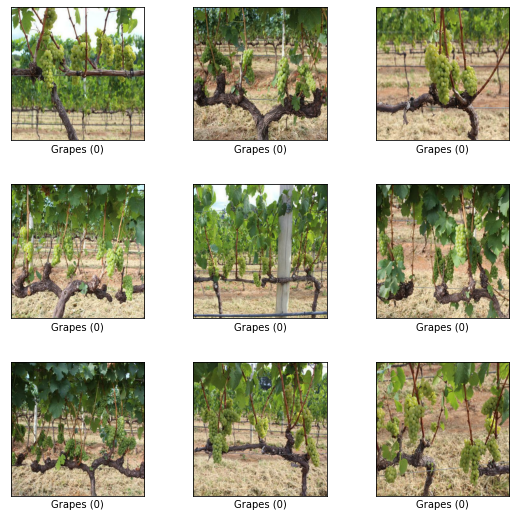

<PrefetchDataset shapes: ((None, 416, 416, 3), (None,)), types: (tf.float32, tf.int64)>
Epoch 1/6
39/39 [==============================] - 1s 20ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 2/6
39/39 [==============================] - 1s 19ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 3/6
39/39 [==============================] - 1s 16ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 4/6
39/39 [==============================] - 1s 16ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 5/6
39/39 [==============================] - 1s 15ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 6/6
39/39 [==============================] - 1s 16ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000


In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label
#just padding so they are all the same size
ds, ds_info = tfds.load(
    'Dataset',
    split='train',
    shuffle_files=True,
    as_supervised=True,  # returns `(img, label)` instead of dict(image=, ...)
    with_info=True,
)
print(ds)   #print(ds_info)
fig = tfds.show_examples(ds, ds_info)   #displays images



#build trainning pipeline- will use this for the model training
ds = ds.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds = ds.cache()
# For true randomness, we set the shuffle buffer to the full dataset size.
ds = ds.shuffle(ds_info.splits['train'].num_examples)
# Batch after shuffling to get unique batches at each epoch.
ds = ds.batch(1)
ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
print(ds)
#print(ds_info)


#using this code to test the pipiline and if the data is being loaded correctly
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(416, 416,3)), #need to change thse values and its fix
  tf.keras.layers.Dense(4,activation='relu'),
  tf.keras.layers.Dense(1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds,
    epochs=6,
    #validation_data=ds,
)